In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('features_112x112.csv')

In [29]:
df

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f12535,f12536,f12537,f12538,f12539,f12540,f12541,f12542,f12543,label
0,0.498039,0.450980,0.478431,0.462745,0.454902,0.501961,0.431373,0.431373,0.392157,0.388235,...,0.219608,0.211765,0.149020,0.141176,0.141176,0.137255,0.137255,0.137255,0.211765,0
1,0.168627,0.164706,0.121569,0.121569,0.117647,0.117647,0.113725,0.113725,0.109804,0.109804,...,0.494118,0.356863,0.447059,0.454902,0.462745,0.466667,0.470588,0.474510,0.474510,0
2,0.211765,0.137255,0.137255,0.137255,0.141176,0.141176,0.149020,0.211765,0.219608,0.141176,...,0.392157,0.431373,0.431373,0.501961,0.454902,0.462745,0.478431,0.450980,0.498039,0
3,0.474510,0.474510,0.470588,0.466667,0.462745,0.454902,0.447059,0.356863,0.494118,0.333333,...,0.109804,0.113725,0.113725,0.117647,0.117647,0.121569,0.121569,0.164706,0.168627,0
4,0.474510,0.490196,0.458824,0.513726,0.474510,0.490196,0.458824,0.513726,0.474510,0.490196,...,0.172549,0.176471,0.133333,0.125490,0.125490,0.133333,0.125490,0.129412,0.168627,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.486275,0.486275,0.482353,0.478431,0.474510,0.466667,0.458824,0.360784,0.501961,0.337255,...,0.113725,0.113725,0.113725,0.117647,0.117647,0.121569,0.121569,0.168627,0.172549,1
316,0.486275,0.505882,0.470588,0.529412,0.486275,0.505882,0.470588,0.529412,0.486275,0.505882,...,0.176471,0.180392,0.125490,0.133333,0.125490,0.125490,0.125490,0.129412,0.172549,1
317,0.215686,0.211765,0.207843,0.133333,0.133333,0.129412,0.125490,0.125490,0.121569,0.117647,...,0.345098,0.470588,0.482353,0.494118,0.501961,0.509804,0.513726,0.517647,0.517647,1
318,0.172549,0.129412,0.125490,0.125490,0.125490,0.133333,0.125490,0.180392,0.176471,0.133333,...,0.486275,0.529412,0.470588,0.505882,0.486275,0.529412,0.470588,0.505882,0.486275,1


In [30]:
X = df.drop(columns=['label'])
Y = df['label']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(sc.fit_transform(X_test), columns=X_test.columns)

In [33]:
#Best Params: {'knn__n_neighbors': 3, 'knn__p': 1, 'knn__weights': 'uniform'}, Train Accuracy: 0.8867, Test Accuracy: 0.7656

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train_scaled)
X_test_trf = pca.transform(X_test_scaled)

In [35]:
np.cumsum(pca.explained_variance_ratio_)

array([0.34362745, 0.6810646 , 0.97198913, 0.98551814, 0.99006965,
       0.99449834, 0.99694718, 0.99880786, 0.99885331, 0.9988965 ,
       0.99893556, 0.99897041, 0.99899856, 0.99902467, 0.99905031,
       0.99907275, 0.99909422, 0.99911463, 0.99913334, 0.99915174,
       0.99916895, 0.99918607, 0.99920234, 0.99921825, 0.99923382,
       0.99924899, 0.99926412, 0.99927914, 0.9992938 , 0.99930814,
       0.99932203, 0.99933577, 0.99934935, 0.99936274, 0.99937582,
       0.99938847, 0.99940091, 0.99941249, 0.99942358, 0.99943424,
       0.99944459, 0.99945487, 0.99946482, 0.99947451, 0.99948407,
       0.99949325, 0.99950218, 0.99951098, 0.99951954, 0.99952787,
       0.9995359 , 0.99954382, 0.99955173, 0.99955932, 0.99956672,
       0.99957386, 0.99958087, 0.99958772, 0.99959454, 0.99960114,
       0.99960761, 0.99961391, 0.99962013, 0.9996263 , 0.9996323 ,
       0.99963826, 0.99964411, 0.99964988, 0.9996556 , 0.99966129,
       0.99966681, 0.99967228, 0.9996777 , 0.99968303, 0.99968

In [36]:
pca.explained_variance_ratio_.shape

(256,)

In [37]:
X_train_trf.shape

(256, 256)

In [38]:
X_train_scaled.shape

(256, 12544)

In [39]:
"""Even though you set n_components=None, PCA cannot return more components than the number of samples. This is due to how PCA works under
the hood — it computes the eigenvectors of the covariance matrix, and that matrix's rank is at most min(n_samples, n_features)."""

"Even though you set n_components=None, PCA cannot return more components than the number of samples. This is due to how PCA works under\nthe hood — it computes the eigenvectors of the covariance matrix, and that matrix's rank is at most min(n_samples, n_features)."

In [40]:
np.cumsum(pca.explained_variance_ratio_)

array([0.34362745, 0.6810646 , 0.97198913, 0.98551814, 0.99006965,
       0.99449834, 0.99694718, 0.99880786, 0.99885331, 0.9988965 ,
       0.99893556, 0.99897041, 0.99899856, 0.99902467, 0.99905031,
       0.99907275, 0.99909422, 0.99911463, 0.99913334, 0.99915174,
       0.99916895, 0.99918607, 0.99920234, 0.99921825, 0.99923382,
       0.99924899, 0.99926412, 0.99927914, 0.9992938 , 0.99930814,
       0.99932203, 0.99933577, 0.99934935, 0.99936274, 0.99937582,
       0.99938847, 0.99940091, 0.99941249, 0.99942358, 0.99943424,
       0.99944459, 0.99945487, 0.99946482, 0.99947451, 0.99948407,
       0.99949325, 0.99950218, 0.99951098, 0.99951954, 0.99952787,
       0.9995359 , 0.99954382, 0.99955173, 0.99955932, 0.99956672,
       0.99957386, 0.99958087, 0.99958772, 0.99959454, 0.99960114,
       0.99960761, 0.99961391, 0.99962013, 0.9996263 , 0.9996323 ,
       0.99963826, 0.99964411, 0.99964988, 0.9996556 , 0.99966129,
       0.99966681, 0.99967228, 0.9996777 , 0.99968303, 0.99968

In [41]:
np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.97) + 1

3

In [42]:
#Moving forward with 3 components as it explains over 97% variance of the data

In [43]:
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train_scaled)
X_test_trf = pca.transform(X_test_scaled)

In [44]:
X_train_trf.shape

(256, 3)

In [45]:
X_test_trf.shape

(64, 3)

XGBoost Model Evaluation:
Train Accuracy: 1.0000
Test Accuracy: 0.6250
Precision: 0.5000
Recall: 0.4583
F1 Score: 0.4783
ROC AUC: 0.6365


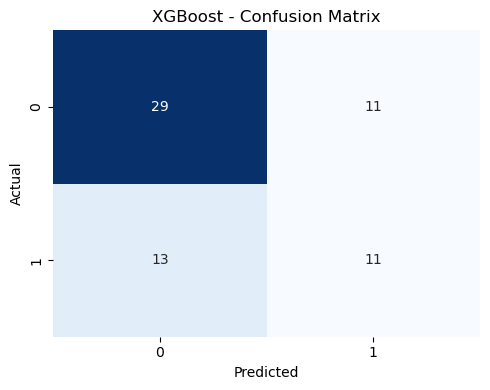

In [46]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score, confusion_matrix
)

from xgboost import XGBClassifier
model = XGBClassifier(eval_metric='logloss')
model.fit(X_train_trf, y_train)

# Predictions
y_train_pred = model.predict(X_train_trf)
y_test_pred = model.predict(X_test_trf)

# Evaluation metrics
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Print results
print("XGBoost Model Evaluation:")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 1.0, 'scale_pos_weight': 1, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.8}

Tuned XGBoost Evaluation:
Train Accuracy: 0.9102
Test Accuracy: 0.6406
Precision: 0.5263
Recall: 0.4167
F1 Score: 0.4651


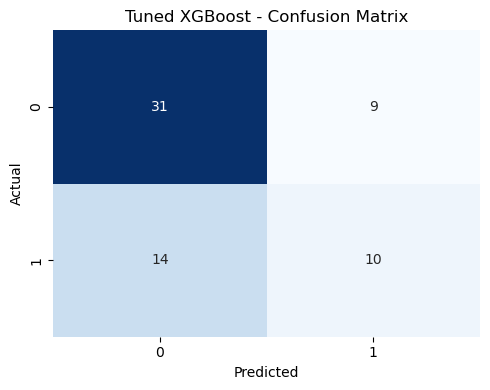

In [50]:
# Import
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer

# Define parameter grid
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'scale_pos_weight': [1, 2, 3]  # especially useful for imbalanced data
}

# Define XGBoost model
xgb = XGBClassifier(eval_metric='logloss')

# Optimize for recall while also balancing accuracy
scorer = make_scorer(accuracy_score)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring=scorer,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit search
random_search.fit(X_train_trf, y_train)

# Best estimator
best_xgb = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Predict & Evaluate
y_train_pred = best_xgb.predict(X_train_trf)
y_test_pred = best_xgb.predict(X_test_trf)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("\nTuned XGBoost Evaluation:")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Tuned XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


Final XGBoost Model (With L1 & L2):
Train Accuracy: 0.8555
Test Accuracy: 0.6406
Precision: 0.5238
Recall: 0.4583
F1 Score: 0.4889
ROC AUC: 0.6214


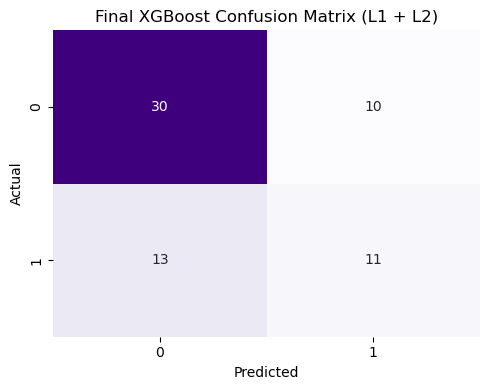

In [59]:
final_model = XGBClassifier(
    n_estimators=200,
    max_depth=7,
    learning_rate=0.05,
    subsample=1.0,
    colsample_bytree=0.8,
    gamma=0.3,
    scale_pos_weight=1,
    reg_alpha=0.5,   # L1 regularization (try 0.1–1.0)
    reg_lambda=2,  # L2 regularization (try 0.1–2.0)
    eval_metric='logloss'
)
final_model.fit(X_train_trf, y_train)

# Evaluate
y_train_pred = final_model.predict(X_train_trf)
y_test_pred = final_model.predict(X_test_trf)
y_test_prob = final_model.predict_proba(X_test_trf)[:, 1]

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_prob)

print("\nFinal XGBoost Model (With L1 & L2):")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title("Final XGBoost Confusion Matrix (L1 + L2)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()